# K-nearest Neighbour (KNN)
KNN is a `supervised Machine Learning` algorithems that can be used to solve both `Classification & Regression` problems.

In [1]:
#Example of KNN classifier on iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor




In [2]:
#load the dataset
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#split the data into  x and y
X=df.drop('species',axis=1)
y=df['species']

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'True')

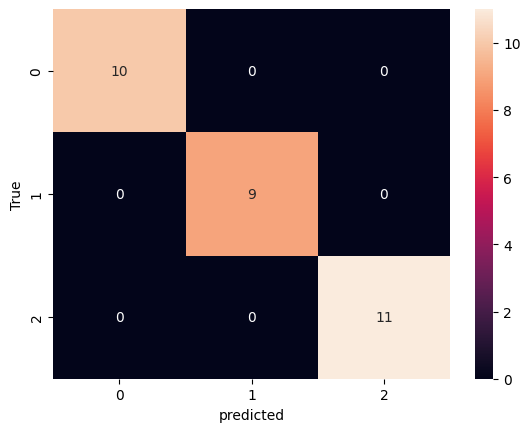

In [5]:
#train test split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#call the model
knn=KNeighborsClassifier(n_neighbors=3)

#fit the model
knn.fit(X_train,y_train)

#predict the species for a new set  of measurements
y_pred=knn.predict(X_test)

#evaluate the model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('predicted')
plt.ylabel('True')


#   KNN Rgression

In [6]:
tip=sns.load_dataset('tips')
tip.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
X=tip.drop('tip',axis=1)
y=tip['tip']

In [10]:
le=LabelEncoder()
for col in X.columns:
    if X[col].dtype=='object' or X[col].dtype=='category':
        X[col]=le.fit_transform(X[col])

In [11]:
#train test split the  data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#call the model
model=KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)

#fit the model
model.fit(X_train,y_train)

#predict
y_pred=model.predict(X_test)

#evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print("r2_score",r2_score(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))



r2_score 0.3294034029001649
mean_squared_error 0.8382265306122448
Root mean_squared_error 0.9155471209130881


In [15]:
#predict a specific value
model.predict([[45,1,0,1,1,5]])


c:\Users\Zain Comp\.conda\envs\python_ml\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([5.292])